In [50]:
import numpy as np
import matplotlib.pyplot as plt
from empirical_data import *
from optimized_random_response import *
from randomized_response import *
from repetitive_optimizer import *
from synthetic_dataset import *
from dataset_handler import Dataset_handler
import seaborn as sns

# IS_UNIFORM = 
FILE_LOCATION = "/Users/sandarujayawardana/Downloads/celeba_anno/list_attr_celeba.txt"
TEST_AMOUNT = 0.7
MAX_UTILITY_ERR_ALOWED = 0.2

Attr_list = ["Male", "Bald", '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive'] #, 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair']#, 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young'] # ["Male", "Big_Nose"] #, "Gray_Hair", "Big_Nose", "Smiling"] #, "Gray_Hair"]
error_cal_type = "l1" # ["0_1", "l1", "l2"]

priority_dict = {"Big_Lips": 4}

# alphabet_dict = {}
dict_attr_node = {}
data_dict = {}

# alphabet_dict_2 = {}
dict_attr_node_2 = {}
data_dict_2 = {}

# Reading txt
with open(FILE_LOCATION, 'r') as txt_file:
    no_of_lines = int(txt_file.readline())
    fields = txt_file.readline()

    for i, attr in enumerate(fields.split()):
      dict_attr_node[attr] = i+1
      data_dict[attr] = []
    print(dict_attr_node)
    print(dict_attr_node.keys())

    # Create alphabet
    for i in range(15000):
        rows = txt_file.readline().split()
        single_row = ""
        for j in list(dict_attr_node.keys()):
            data_dict[j].append(1 if int(rows[dict_attr_node[j]]) == 1 else 0)

dataset_handler = Dataset_handler(data_dict=data_dict)

with open(FILE_LOCATION, 'r') as txt_file:
    no_of_lines_ = int(txt_file.readline())
    fields_ = txt_file.readline()

    for i, attr in enumerate(fields_.split()):
      dict_attr_node_2[attr] = i+1
      data_dict_2[attr] = []
    print(dict_attr_node_2)
    print(dict_attr_node_2.keys())

    # Create alphabet
    for i in range(15000): #50000, 75000):
        rows = txt_file.readline().split()
        single_row = ""
        for j in list(dict_attr_node_2.keys()):
            data_dict_2[j].append(1 if int(rows[dict_attr_node_2[j]]) == 1 else 0)

dataset_handler_test = Dataset_handler(data_dict=data_dict_2)

{'5_o_Clock_Shadow': 1, 'Arched_Eyebrows': 2, 'Attractive': 3, 'Bags_Under_Eyes': 4, 'Bald': 5, 'Bangs': 6, 'Big_Lips': 7, 'Big_Nose': 8, 'Black_Hair': 9, 'Blond_Hair': 10, 'Blurry': 11, 'Brown_Hair': 12, 'Bushy_Eyebrows': 13, 'Chubby': 14, 'Double_Chin': 15, 'Eyeglasses': 16, 'Goatee': 17, 'Gray_Hair': 18, 'Heavy_Makeup': 19, 'High_Cheekbones': 20, 'Male': 21, 'Mouth_Slightly_Open': 22, 'Mustache': 23, 'Narrow_Eyes': 24, 'No_Beard': 25, 'Oval_Face': 26, 'Pale_Skin': 27, 'Pointy_Nose': 28, 'Receding_Hairline': 29, 'Rosy_Cheeks': 30, 'Sideburns': 31, 'Smiling': 32, 'Straight_Hair': 33, 'Wavy_Hair': 34, 'Wearing_Earrings': 35, 'Wearing_Hat': 36, 'Wearing_Lipstick': 37, 'Wearing_Necklace': 38, 'Wearing_Necktie': 39, 'Young': 40}
dict_keys(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_M

## Group correlated attributes

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


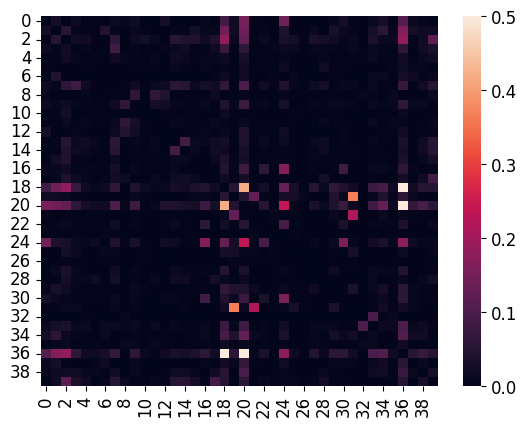

In [51]:
from simpleinfotheory import mutualinformationempirical

num_attributes = len(dataset_handler.get_attribute_list())
mi_pair_wise = np.zeros((num_attributes, num_attributes))

for index_i, i in enumerate(dataset_handler.get_attribute_list()[:]):
    print(index_i)
    for index_j, j in enumerate(dataset_handler.get_attribute_list()[:]):
        if i == j:
            continue
        # print(index_i, index_j)
        # print(np.shape(dataset_handler.get_encoded_orignal_dataset()[i]))
        # print(dataset_handler.get_encoded_orignal_dataset()[i])
        mi_pair_wise[index_i][index_j] = mutualinformationempirical(dataset_handler.get_encoded_orignal_dataset()[i], dataset_handler.get_encoded_orignal_dataset()[j])[0]
sns.heatmap(mi_pair_wise, vmax=0.5, vmin=0)
plt.show()

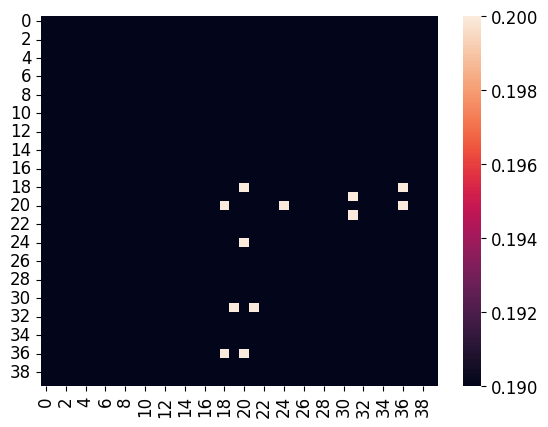

In [79]:
sns.heatmap(mi_pair_wise, vmin=0.19, vmax=0.2)
plt.show()

In [53]:
MI_THRESHOLD = 0.19
visited_attributes = []
grouped_attributes = {}
attribute_list = dataset_handler.get_attribute_list()

def depth_first_visit(source_attr_index, dict_key):
    global visited_attributes
    global grouped_attributes

    for tgt in range(len(attribute_list)):
        if attribute_list[tgt] in visited_attributes:
            continue
        
        if mi_pair_wise[source_attr_index][tgt] >= MI_THRESHOLD:
            grouped_attributes[dict_key].append(attribute_list[tgt])
            visited_attributes.append(attribute_list[tgt])
            depth_first_visit(tgt, dict_key)

for src in range(len(attribute_list)):
    if attribute_list[src] in visited_attributes:
        continue
    visited_attributes.append(attribute_list[src])
    grouped_attributes[attribute_list[src]] = []
    for tgt in range(len(attribute_list)):
        if attribute_list[tgt] in visited_attributes:
            continue
        
        if mi_pair_wise[src][tgt] >= MI_THRESHOLD:
            grouped_attributes[attribute_list[src]].append(attribute_list[tgt])
            visited_attributes.append(attribute_list[tgt])
            depth_first_visit(tgt, attribute_list[src])

grouped_attributes_list = []
for i in list(grouped_attributes.keys()):
    innner_list = [i]
    for j in grouped_attributes[i]:
        innner_list.append(j)
    grouped_attributes_list.append(innner_list)

print(grouped_attributes_list)

# grouped_attributes_list  = [['Bald', 'Male', 'Big_Lips']]

[['5_o_Clock_Shadow'], ['Arched_Eyebrows'], ['Attractive'], ['Bags_Under_Eyes'], ['Bald'], ['Bangs'], ['Big_Lips'], ['Big_Nose'], ['Black_Hair'], ['Blond_Hair'], ['Blurry'], ['Brown_Hair'], ['Bushy_Eyebrows'], ['Chubby'], ['Double_Chin'], ['Eyeglasses'], ['Goatee'], ['Gray_Hair'], ['Heavy_Makeup', 'Male', 'No_Beard', 'Wearing_Lipstick'], ['High_Cheekbones', 'Smiling', 'Mouth_Slightly_Open'], ['Mustache'], ['Narrow_Eyes'], ['Oval_Face'], ['Pale_Skin'], ['Pointy_Nose'], ['Receding_Hairline'], ['Rosy_Cheeks'], ['Sideburns'], ['Straight_Hair'], ['Wavy_Hair'], ['Wearing_Earrings'], ['Wearing_Hat'], ['Wearing_Necklace'], ['Wearing_Necktie'], ['Young']]


## Alphabets

In [54]:
from alphabet import create_alphabet

alphabet_list = []
alphabet_list_string = []

for i in grouped_attributes_list:
    attributes_with_alphabet = {}
    for j in i:
        attributes_with_alphabet[j] = np.unique(data_dict[j])
    alphabet_list.append(create_alphabet(attributes_with_alphabet=attributes_with_alphabet))
    inner_list = []
    for k in alphabet_list[-1]:
        v = ""
        for l in k:
            v += str(l) + " "
        inner_list.append(v)
    alphabet_list_string.append(inner_list)
    # print(alphabet_list_string[-1])

## Prior Distribution

In [55]:
from prior_distribution_calc import Prior_distribution_calc

prior_distribution_objects = []

for i in range(len(grouped_attributes_list)):
    # print(grouped_attributes_list[i])
    # print(alphabet_list[i])
    prior = Prior_distribution_calc(attribute_list=grouped_attributes_list[i], alphabet=alphabet_list[i], data=dataset_handler.get_encoded_orignal_dataset())
    prior_distribution_objects.append(prior)
    # print(prior.get_prior_distribution())

## Error matrix define

In [56]:
# # import numpy as np

# def error_cal(actual, perturbed, alphabet_dict={}, err_type = "0_1", check = False):
#     if check and isinstance(actual, str):
#         actual = list(alphabet_dict.keys()).index(actual)
#         perturbed = list(alphabet_dict.keys()).index(perturbed)
#     # print(actual, perturbed)
#     if err_type == "0_1":
#         return 0 if (actual == perturbed) else 1
#     elif err_type == "l1":
#         return abs((actual)-(perturbed)) # np.linalg.norm(((actual)-(perturbed)), 1)
#     elif err_type == "l2":
#         return ((actual)-(perturbed))**2 #np.linalg.norm(((actual)-(perturbed)), 2)
#     else:
#         raise TypeError(f"Unknown error type {err_type}")

# class Normalize_error_matrix:
#     def __init__(self, attribute_list, alphabet, priority_dict):
#         # print(alphabet)
#         self.attribute_list = attribute_list
#         self.alphabet = alphabet
#         self.priority_dict = priority_dict

#         self.normalized_error_matrix = np.zeros((len(alphabet), len(alphabet)))
#         # print(np.shape(self.normalized_error_matrix))

#         for index_i, i in enumerate(alphabet): # input
#             for index_j, j in enumerate(alphabet): # output
#                 # print("i", i, "j", j)
#                 # print(self.normalized_error_matrix[i][j])
#                 err = self.err(i, j)
#                 self.normalized_error_matrix[index_i][index_j] = err
#         self.__max_value = np.max(self.normalized_error_matrix)
#         self.normalized_error_matrix /= self.__max_value

#     def err(self, actual, perturbed):
#         # print(actual, perturbed)
#         err = 0
#         for k in range(len(self.alphabet[0])):
#             attribute = self.attribute_list[k]
#             if attribute in list(self.priority_dict.keys()):
#                 priority = self.priority_dict[attribute]
#             else:
#                 priority = 1
#             err += error_cal(actual=actual[k], perturbed=perturbed[k], err_type="0_1")*priority
#         return err

#     def get_value_error(self, actual, perturbed):
#         # print(actual, perturbed)
#         if isinstance(actual, str):
#             actual_split = actual.split(" ")
#             actual = []
#             # print(actual_split)
#             for i in actual_split:
#                 # print(i)
#                 if i != "" :
#                     actual.append(int(i))
#             actual = np.array(actual)

#             perturbed_split = perturbed.split(" ")
#             perturbed = []
#             for i in perturbed_split:
#                 if i != "":
#                     perturbed.append(int(i))
#             perturbed = np.array(perturbed)
#         # print(actual, perturbed)
#         err = self.err(actual=actual, perturbed=perturbed)
#         return err/self.__max_value


In [57]:
from normalize_error_matrix import *

normalize_error_matrix_objects = []

for i in range(len(grouped_attributes_list)):
    err_matrix = Normalize_error_matrix(attribute_list=grouped_attributes_list[i], alphabet=alphabet_list[i], priority_dict=priority_dict)
    normalize_error_matrix_objects.append(err_matrix)
    # sns.heatmap(err_matrix.normalized_error_matrix)
    # plt.show()

In [58]:
def mutual_information(a, b):
    processed_a = []
    for i in a:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_a.append(np.array(actual))
    processed_a = np.array(processed_a)
    processed_b = []
    
    for i in b:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_b.append(np.array(actual))
    processed_b = np.array(processed_b)

    mi = []
    # print("processed_a", processed_a)
    # print("processed_b", processed_b)
    for i in range(np.shape(processed_b)[1]):
        mi.append(mutualinformationempirical(processed_a[:,i], processed_b[:,i])[0])
    
    return mi
    

In [94]:
error_cal_type = "0_1"
optimal_utility_error = []
optimal_mi = []
k_rr_utility_error = []
k_rr_mi = []
eps_array = np.arange(15)*0.5

mse_mi_rr = []
mse_mi_optimal = []

perturbed_dataset_rr_list = []
perturbed_dataset_optimal_list = []

perturbed_dataset_rr = np.ones((len(eps_array), dataset_handler_test.num_of_samples, 40)) * 9
perturbed_dataset_optimal = np.ones((len(eps_array), dataset_handler_test.num_of_samples, 40)) * 9

def decode_string(encoded_input):
    actual_split = encoded_input.split(" ")
    actual = []
    # print(actual_split)
    for j in actual_split:
        # print(i)
        if j != "" :
            actual.append(int(j))
    return actual

for i in range(len(grouped_attributes_list)):
    # print(i)
    # if len(grouped_attributes_list[i]) == 1:
    #     continue
    rr_mechanism = Randomized_Response(len(alphabet_list[i]), alphabet_list_string[i])

    optimal_rr_mechanism = Optimized_Randomized_Response(prior_dist = prior_distribution_objects[i].get_prior_distribution(), STATE_COUNT = len(alphabet_list[i]), INPUT_ALPHABET = alphabet_list_string[i], normalized_objective_err_matrix = normalize_error_matrix_objects[i].normalized_error_matrix, 
                 TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "SCS", is_kl_div = True, ALPHA=0.01, accelerate_from_rr=True)
    
    error_list = []
    error_list_2 = []
    squared_error_list = []
    var_err_sum_dict = {}
    var_err_sum_count_dict = {}
    
    MI_rr = []
    MI_optimal = []

    data_set_string = []

    dataset_ = []

    for j in grouped_attributes_list[i]:
        dataset_.append(dataset_handler_test.get_encoded_orignal_dataset()[j])
    # print(dataset_)
    for j in range(len(dataset_[0])):
        v = ""
        for k in range(len(dataset_)):
            v += str(dataset_[k][j]) + " "
        data_set_string.append(v)
    # print(data_set_string)

    for eps_index_, eps in enumerate(eps_array):
        # rr_mechanism_ = rr_mechanism.get_mechanism(eps=eps)
        # optimal_mechanim_ = optimal_rr_mechanism.get_mechanism(eps=eps)
        # sns.heatmap(optimal_mechanim_, vmin=0.0, vmax=0.9)
        # plt.show()
        total_error = 0
        total_error_2 = 0
        total_squared_error = 0
        perturbed_output_list = []
        optimal_perturbed_output_list = []
        for sample_index__, val in enumerate(data_set_string):
            perturbed_output_list.append(rr_mechanism.gen_random_output(actual_value=val, eps=eps)[0])
            optimal_perturbed_output_list.append(optimal_rr_mechanism.gen_random_output(actual_value=val, eps=eps)[0])

            decoded_value = decode_string(perturbed_output_list[-1])
            for index___, attr___ in enumerate(grouped_attributes_list[i]):
                perturbed_dataset_rr[eps_index_][sample_index__][dict_attr_node[attr___] - 1] = decoded_value[index___]

            decoded_value = decode_string(optimal_perturbed_output_list[-1])
            for index___, attr___ in enumerate(grouped_attributes_list[i]):
                perturbed_dataset_optimal[eps_index_][sample_index__][dict_attr_node[attr___] - 1] = decoded_value[index___]
            
            # print("a", perturbed_output_list[-1])
            # print("b", optimal_perturbed_output_list[-1])
            total_error += normalize_error_matrix_objects[i].get_value_error(actual=val, perturbed=perturbed_output_list[-1]) #error_cal(actual=i, perturbed=perturbed_output_list[-1], err_type=error_cal_type) 
            total_error_2 += normalize_error_matrix_objects[i].get_value_error(actual=val, perturbed=optimal_perturbed_output_list[-1]) #error_cal(actual=i, perturbed=optimal_perturbed_output_list[-1], err_type=error_cal_type) 
        # MI_rr.append(mutual_information(perturbed_output_list, data_set_string))
        # MI_optimal.append(mutual_information(optimal_perturbed_output_list, data_set_string))
        MI_rr.append([mutualinformationempirical(perturbed_output_list, data_set_string)[0]])
        MI_optimal.append([mutualinformationempirical(optimal_perturbed_output_list, data_set_string)[0]])
        error_list.append(total_error/(len(data_set_string)))
        error_list_2.append(total_error_2/(len(data_set_string)))
    optimal_utility_error.append(error_list_2)
    k_rr_utility_error.append(error_list)
    optimal_mi.append(MI_optimal)
    k_rr_mi.append(MI_rr)

    rr_eps_array, rr_error_list = eps_array, error_list

    rr_var_list = []

    legend = []
    # plt.plot(eps_array, error_list)
    # plt.plot(eps_array, error_list_2)
    # legend.append("exp. error RR")
    # legend.append("exp. error Optimal")
    # for mi_ in range(len(MI_rr[0])):
    #     plt.plot(eps_array, np.array(MI_rr)[:,mi_])
    #     plt.plot(eps_array, np.array(MI_optimal)[:,mi_])
    #     legend.append(f"MI for RR, attr:{grouped_attributes_list[i][mi_]}")
    #     legend.append(f"MI for Optimal, attr:{grouped_attributes_list[i][mi_]}")
    # # plt.legend(["training_joint_prob vs perturbed", "test_joint_prob vs perturbed"], loc ="upper left")
    # plt.xlabel("Epsilon")
    # plt.ylabel("Error (Normalized)")
    # # plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
    # plt.legend(legend)
    # plt.show()

0.0
l2_error  0.7933840223948161
0.5
l2_error  0.7677047834983318
1.0
l2_error  0.7480250351112457
1.5
l2_error  0.7039755468141302
2.0
l2_error  0.6257580082445783
2.5
l2_error  0.3708650605247884
3.0
l2_error  0.23983108617971832
3.5
l2_error  0.12941338342867958
4.0
l2_error  0.04287682488898998
4.5
l2_error  2.4460366563736585e-05
0.0
l2_error  0.48932123161551466
0.5
l2_error  0.43570631809553817
1.0
l2_error  0.3838708640014949
1.5
l2_error  0.2550307591426495
2.0
l2_error  0.1800854074160215
2.5
l2_error  0.11217760017437306
3.0
l2_error  0.05744927643379922
3.5
l2_error  0.017928362107225437
4.0
l2_error  4.220354937390472e-05
0.0
l2_error  0.04655921400813847
0.5
l2_error  0.00019054090232840883
0.0
l2_error  0.6071626820361796
0.5
l2_error  0.5568141454891091
1.0
l2_error  0.5073196982529011
1.5
l2_error  0.36669303728859287
2.0
l2_error  0.2724997003939649
2.5
l2_error  0.1814474207914568
3.0
l2_error  0.10396816719712805
3.5
l2_error  0.043889699410892394
4.0
l2_error  1.11

/Users/sandarujayawardana/Documents/Python_code/.venv/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


3.5
l2_error  1.368597430474717
4.0
l2_error  0.24364758206033724
4.5
l2_error  0.02234384523375025
5.0
l2_error  3.9208648576284694e-05
0.0
l2_error  0.7219340306412936
0.5
l2_error  0.683602809349985
1.0
l2_error  0.6473860799475559
1.5
l2_error  0.5899595242156923
2.0
l2_error  0.3976013663278007
2.5
l2_error  0.28003435551788786
3.0
l2_error  0.17213014499980128
3.5
l2_error  0.08595742014461477
4.0
l2_error  0.02184003327207223
4.5
l2_error  3.617371074297668e-05
0.0
l2_error  0.543157635519523
0.5
l2_error  0.49071528514353285
1.0
l2_error  0.43805566823997183
1.5
l2_error  0.3042377851771316
2.0
l2_error  0.21885517768028973
2.5
l2_error  0.1394262781013461
3.0
l2_error  0.07618173967662738
3.5
l2_error  0.02887723250246456
4.0
l2_error  1.749458538972983e-05
0.0
l2_error  0.5406930300663538
0.5
l2_error  0.4872416589469296
1.0
l2_error  0.43531436789342504
1.5
l2_error  0.29968768354087194
2.0
l2_error  0.21700277310488908
2.5
l2_error  0.1379573285763409
3.0
l2_error  0.074602

In [85]:
np.linalg.norm(mi_pair_wise - mi_pair_wise_pertubed_optimal)

0.027326403331553065

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


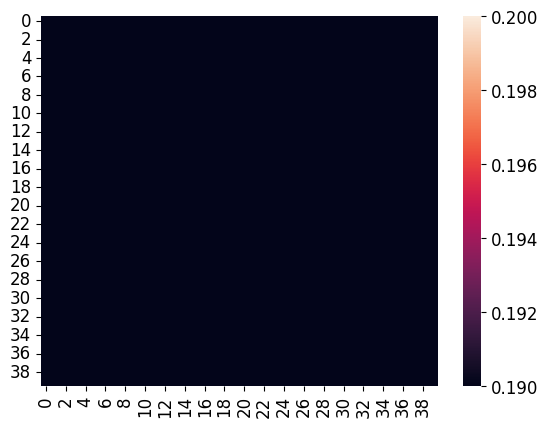

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


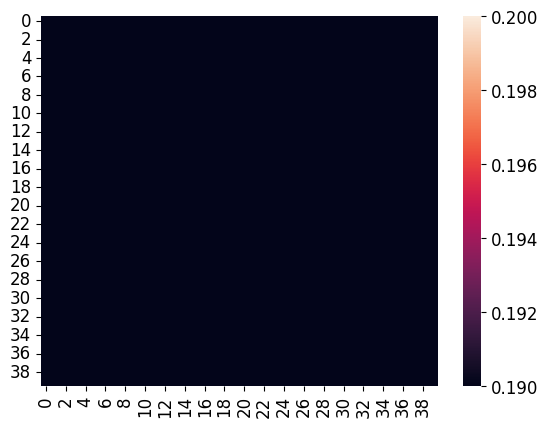

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


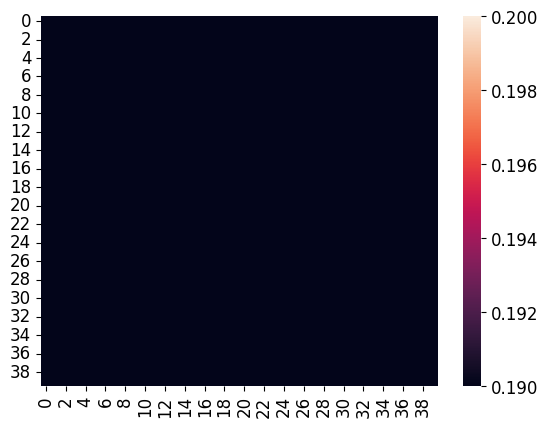

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


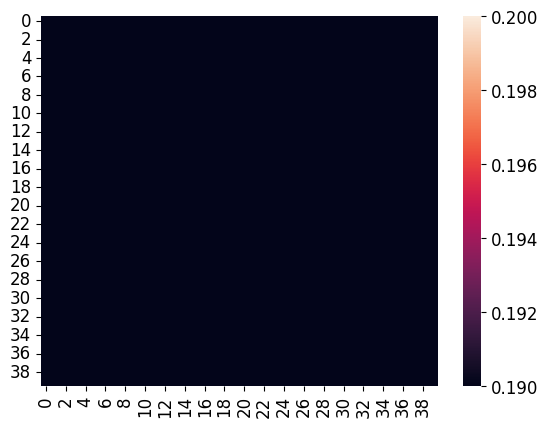

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


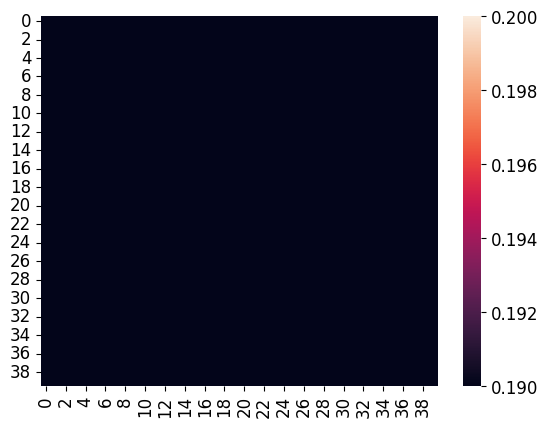

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


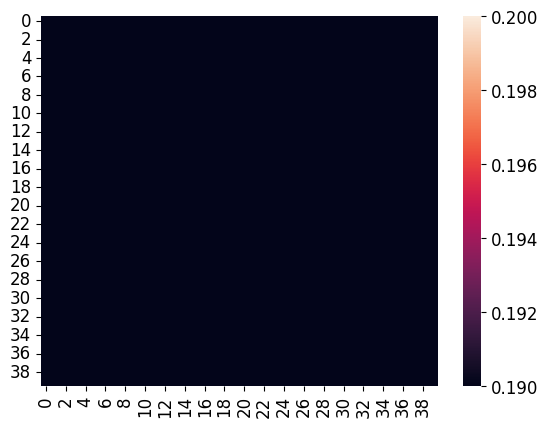

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


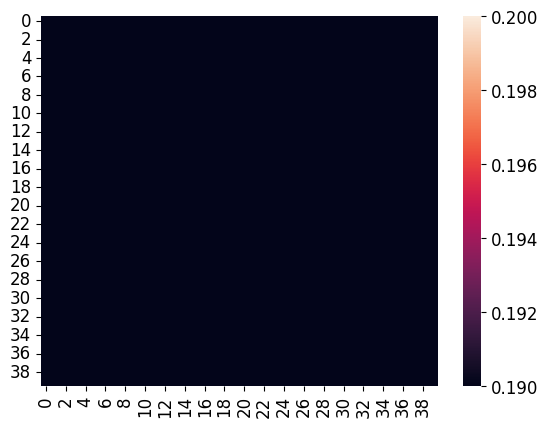

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


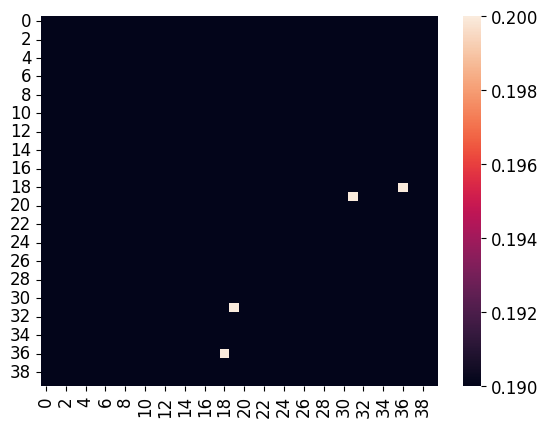

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


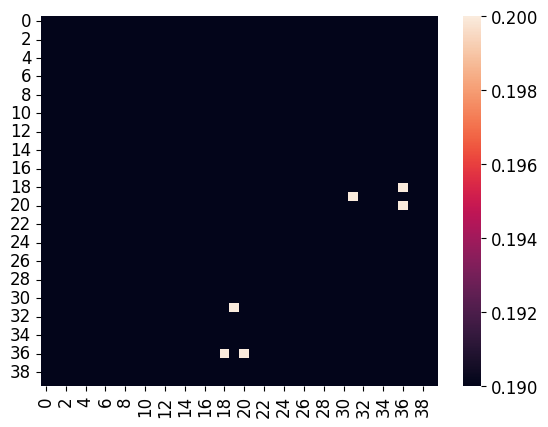

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


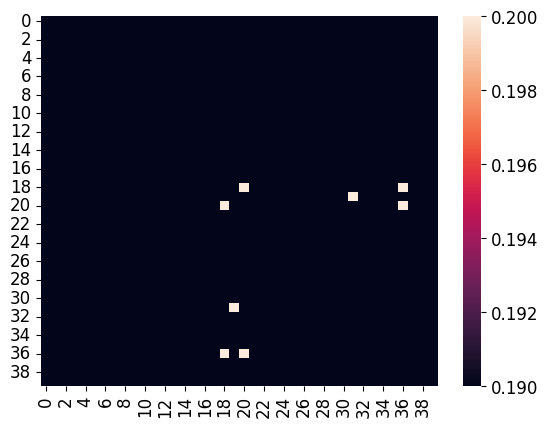

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


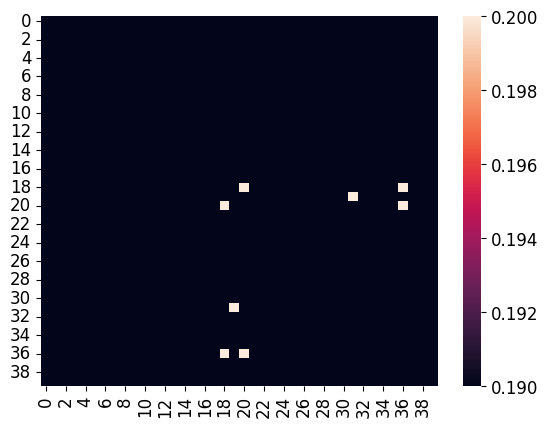

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


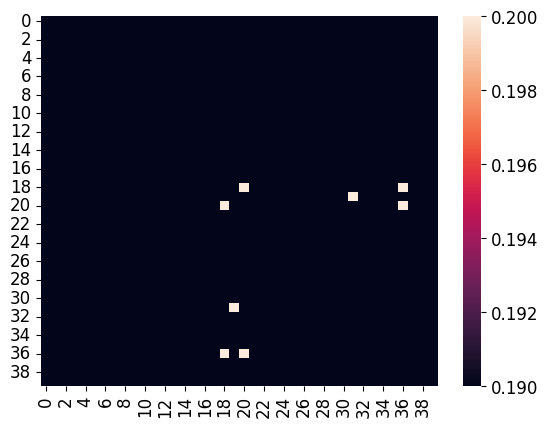

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


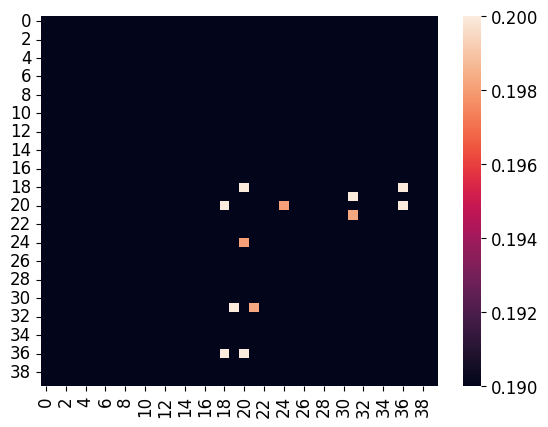

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


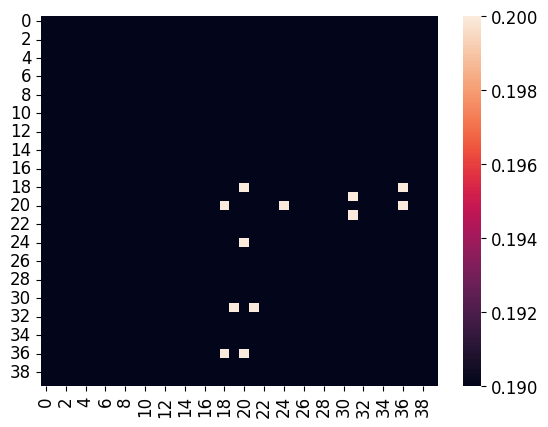

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


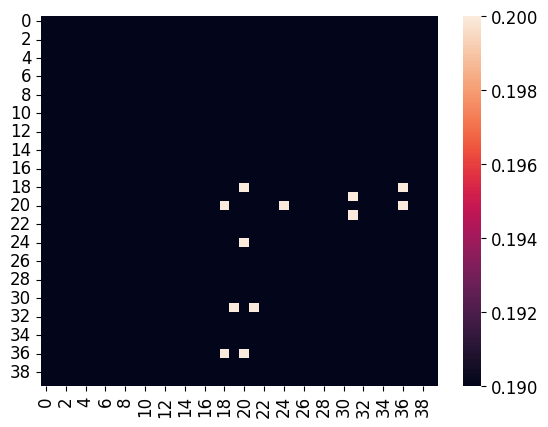

In [95]:
mse_mi_rr= []

for eps_i in range(len(eps_array)):
    num_attributes = len(dataset_handler.get_attribute_list())
    mi_pair_wise_pertubed_rr = np.zeros((num_attributes, num_attributes))

    for index_i, i in enumerate(dataset_handler.get_attribute_list()[:]):
        print(index_i)
        for index_j, j in enumerate(dataset_handler.get_attribute_list()[:]):
            if i == j:
                continue
            # print(index_i, index_j)
            # print(np.shape(dataset_handler.get_encoded_orignal_dataset()[i]))
            # print(dataset_handler.get_encoded_orignal_dataset()[i])
            mi_pair_wise_pertubed_rr[index_i][index_j] = mutualinformationempirical(perturbed_dataset_rr[eps_i,:5000,index_i], perturbed_dataset_rr[eps_i,:5000,index_j])[0]
    mse_mi_rr.append(np.linalg.norm(mi_pair_wise - mi_pair_wise_pertubed_rr))
    sns.heatmap(mi_pair_wise_pertubed_rr, vmax=0.2, vmin=0.19)
    plt.show()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


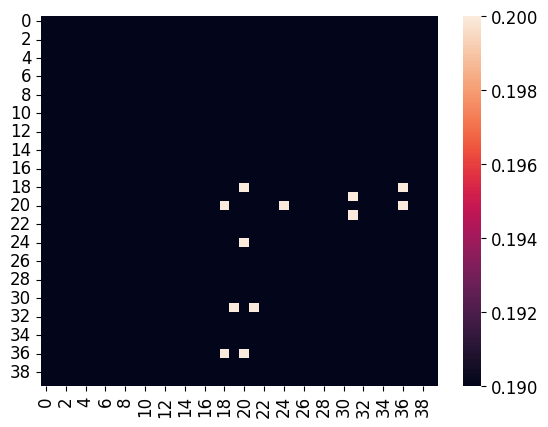

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


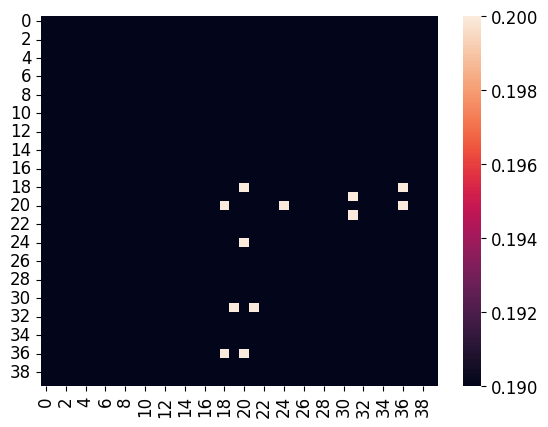

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


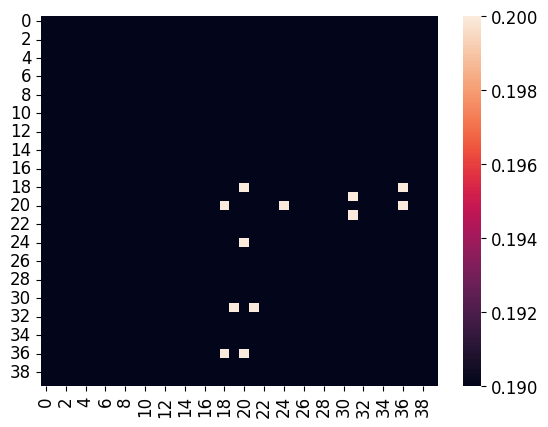

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


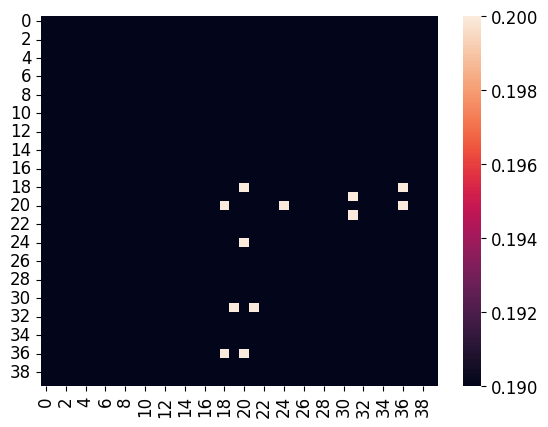

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


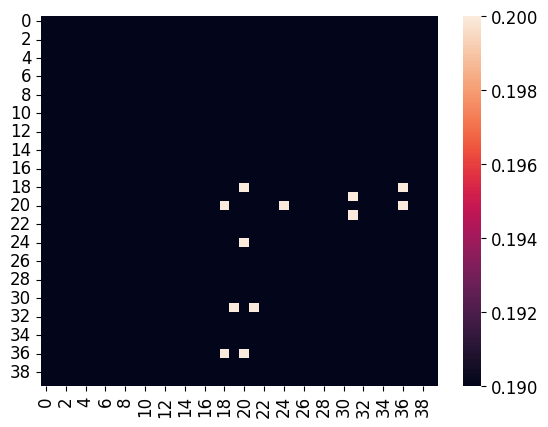

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


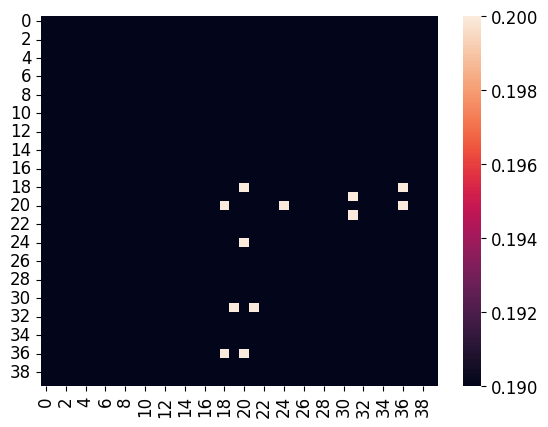

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


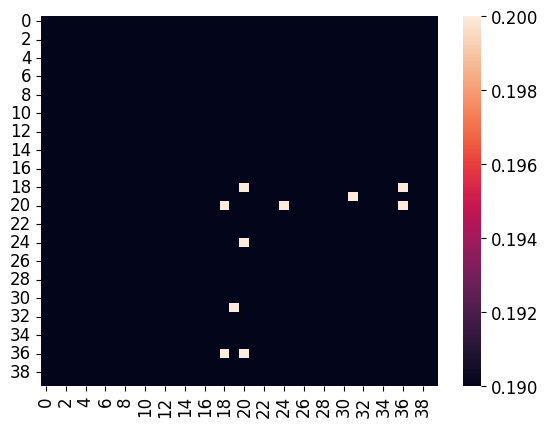

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


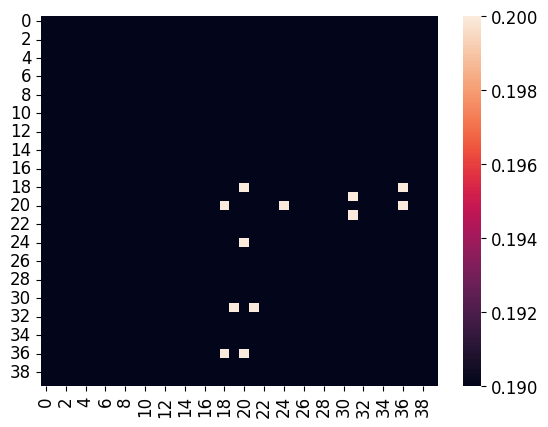

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


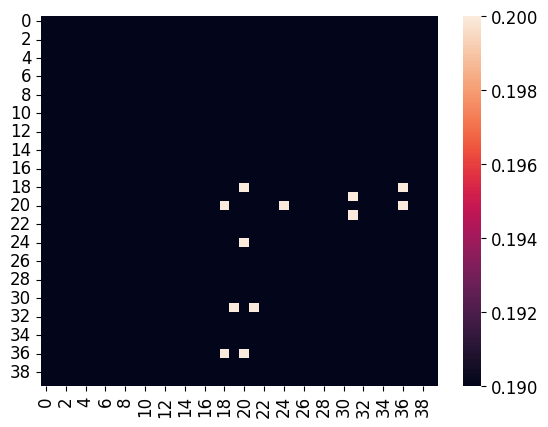

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


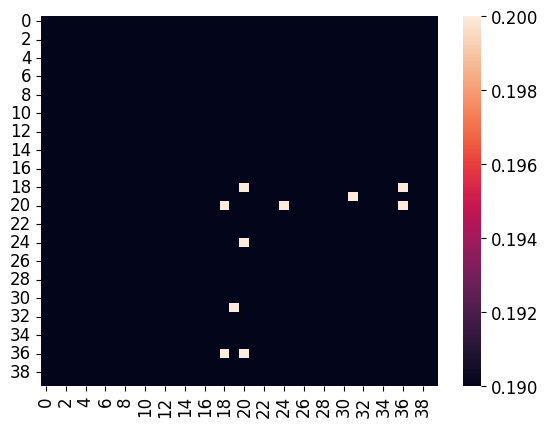

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


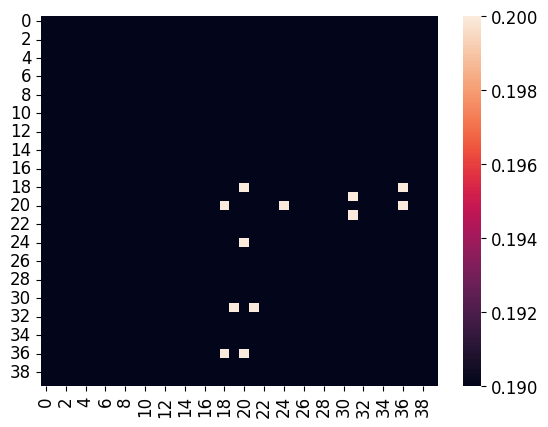

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


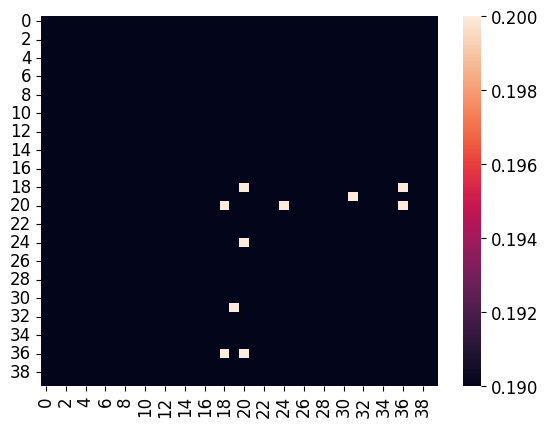

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


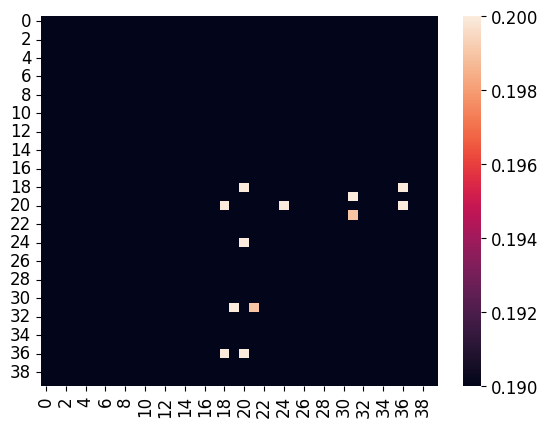

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


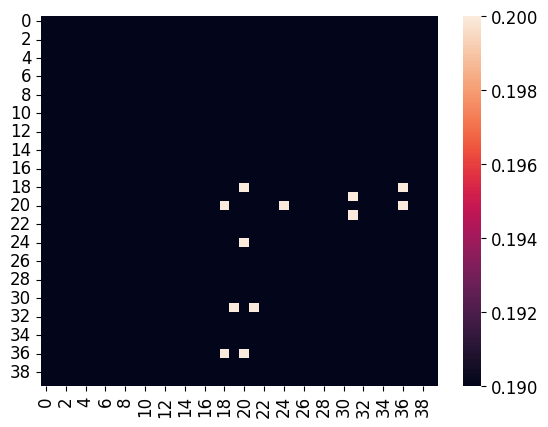

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


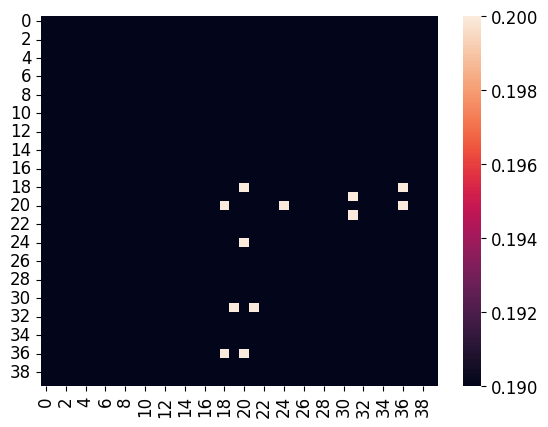

In [96]:
mse_mi_optimal = []

for eps_i in range(len(eps_array)):
    num_attributes = len(dataset_handler.get_attribute_list())
    mi_pair_wise_pertubed_optimal = np.zeros((num_attributes, num_attributes))

    for index_i, i in enumerate(dataset_handler.get_attribute_list()[:]):
        print(index_i)
        for index_j, j in enumerate(dataset_handler.get_attribute_list()[:]):
            if i == j:
                continue
            # print(index_i, index_j)
            # print(np.shape(dataset_handler.get_encoded_orignal_dataset()[i]))
            # print(dataset_handler.get_encoded_orignal_dataset()[i])
            mi_pair_wise_pertubed_optimal[index_i][index_j] = mutualinformationempirical(perturbed_dataset_optimal[eps_i,:5000,index_i], perturbed_dataset_optimal[eps_i,:5000,index_j])[0]
    mse_mi_optimal.append(np.linalg.norm(mi_pair_wise - mi_pair_wise_pertubed_optimal))
    sns.heatmap(mi_pair_wise_pertubed_optimal, vmax=0.2, vmin=0.19)
    plt.show()

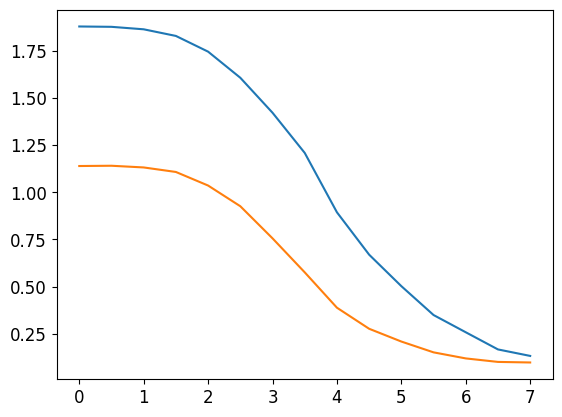

In [97]:

plt.plot(eps_array, mse_mi_rr)
plt.plot(eps_array, mse_mi_optimal)
plt.show()

info_dict  {'k-RR': [22.493339391322785, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'Our': [22.299296554600282, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]}


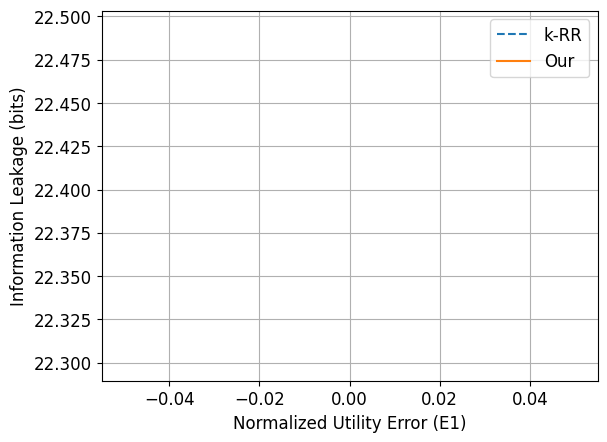

In [62]:
import math
import matplotlib as mpl
import matplotlib.lines as mlines

mpl.rcParams.update({'font.size': 12})

utility_error_dict = {"k-RR": k_rr_utility_error, "Our": optimal_utility_error}
mi_dict = {"k-RR": k_rr_mi, "Our": optimal_mi}

utility_error = np.arange(15)
utility_error = utility_error/np.max(utility_error)

tolerance = (utility_error[1] - utility_error[0])/2

info_dict = {}

for mechanism in list(utility_error_dict.keys()):
    info_dict[mechanism] = []
    for i in utility_error:
        info_dict[mechanism].append(np.nan)

for index_1, i in enumerate(utility_error):
    for mechanism in list(utility_error_dict.keys()):
        for index_j, j in enumerate(utility_error_dict[mechanism]):
            # print("index_j, j ", index_j, j)
            for index_k, k in enumerate(j):
                # print("index_k, k ", index_k, k)
                if abs(i-k) < tolerance:
                    # print("info_dict[mechanism][index_1]", info_dict[mechanism][index_1])
                    if math.isnan(info_dict[mechanism][index_1]):
                        info_dict[mechanism][index_1] = 0
                    # print("inner ", mi_dict[mechanism], utility_error_dict[mechanism], index_j, index_k)
                    info_dict[mechanism][index_1] += (mi_dict[mechanism][index_j][index_k][0])
                    break

lagends = []
fig = plt.figure()
print("info_dict ", info_dict)
line_styles = {"RAPPOR": ":", "k-RR": "--", "Exponential": "-.", "Our": "-"}
for mechanism in list(utility_error_dict.keys()):
    lagends.append(mechanism)
    plt.plot(utility_error, info_dict[mechanism], linestyle=line_styles[mechanism])


plt.grid(visible=True)
plt.ylabel("Information Leakage (bits)")
plt.xlabel("Normalized Utility Error (E1)")
plt.legend(lagends)

plt.show()
fig.savefig(f"celeba_.pdf", bbox_inches='tight')



In [63]:
info_dict

{'k-RR': [22.493339391322785,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'Our': [22.299296554600282,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan]}